In [1]:
import numpy as np
import operator
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def loadDataSet(fileName):      #general function to parse tab -delimited floats
    numFeat = len(open(fileName).readline().split('\t')) - 1 #get number of fields 
    dataMat = []; 
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr =[]
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat,labelMat

In [3]:
xArr,yArr = loadDataSet("ex0.txt")

In [4]:
def plot_line(xArr, yArr, w):
    x = np.array(xArr)
    plt.scatter(x[:,1], yArr,marker='.',color = 'r')
    if any(w) :
        plt.plot(x[:,1],x.dot(w),color = "blue",linestyle = "-")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Line regression')
    plt.show()

In [5]:
def plot_line2(xArr, yArr, y):
    x = np.array(xArr)
    plt.scatter(x[:,1], yArr,marker='.',color = 'r')
    if any(y) :
        srtIndex = x[:,1].argsort(0)
        x_sort = x[srtIndex]
        plt.plot(x_sort[:,1],y[srtIndex],color = "blue",linestyle = "-")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Line regression')
    plt.show()

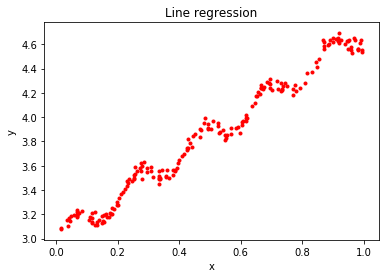

In [6]:
plot_line(xArr,yArr, {})

In [7]:
def standRegres(xArr,yArr):
    xMat = np.mat(xArr); 
    yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    # det 求矩阵的行列式，如果行列式为0 矩阵就不可逆
    if np.linalg.det(xTx) == 0.0:
        print ("This matrix is singular, cannot do inverse")
        return
    # 这个公式对应周志华 机器学习中的 公式 3.11 (T(X)X)^-1(T(X)y)
    # 这个和 gradAscent 应该式等价的，logic regress中是用梯度法，这个是直接求解
    ws = np.linalg.solve(xTx, xMat.T*yMat)
    #ws = xTx.I * (xMat.T*yMat)
    return ws

In [8]:
w = standRegres(xArr,yArr)

In [9]:
w.A

array([[3.00774324],
       [1.69532264]])

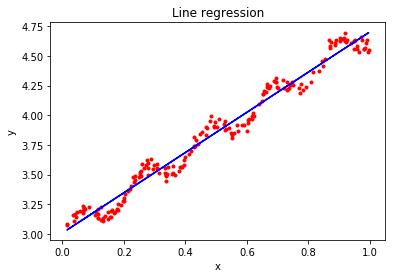

In [10]:
plot_line(xArr,yArr,w.A)

In [11]:
yHat = np.array(xArr).dot(w.A)
#np.corrcoef(yHat.T[0],yArr)
np.corrcoef(yHat.ravel(),yArr)

array([[1.        , 0.98647356],
       [0.98647356, 1.        ]])

In [12]:
# 这个方法是从 第5节中 抄来的，修改了第13行，去掉了 sigmoid 函数调用 
def lineRegression(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)             #convert to NumPy matrix
    labelMat = np.mat(classLabels).transpose() #convert to NumPy matrix
    m,n = np.shape(dataMatrix)
    alpha = 0.001
    maxCycles = 5000
    weights = np.ones((n,1))
    minE = m * 0.01 # 如果误差足够小就停止
    # 这应该不是一个好的停止条件
    # 好的停止条件应该是 weights 的变化小于一定的数值，weights 收敛
    for k in range(maxCycles):     #heavy on matrix operations
        h = dataMatrix*weights     # sigmoid
        # error就是 戴尔塔 f(x,y)
        error = (labelMat - h) 
        totalError = sum(abs(error))        
        #vector subtraction
        if totalError < minE : 
            print(k, totalError)
            break;
        # dataMatrix.transpose()* error 
        # 这个公式对应周志华 机器学习中的 公式 3.10 T(X)(X*W-y)
        weights = weights + alpha * dataMatrix.transpose()* error #matrix mult
    return weights

In [13]:
w2 = lineRegression(xArr,yArr)
w2.A

array([[3.00774324],
       [1.69532264]])

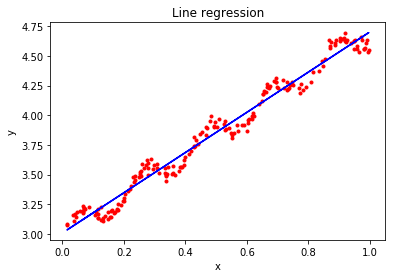

In [14]:
plot_line(xArr,yArr,w2.A)

In [15]:
def lwlr(testPoint,xArr,yArr,k=1.0):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    m = np.shape(xMat)[0]
    weights = np.mat(np.eye((m)))
    for j in range(m):                      #next 2 lines create weights matrix
        diffMat = testPoint - xMat[j,:]     #
        weights[j,j] = np.exp(diffMat*diffMat.T/(-2.0*k**2))
    xTx = xMat.T * (weights * xMat)
    if np.linalg.det(xTx) == 0.0:
        print ("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T * (weights * yMat))
    return testPoint * ws

In [16]:
def lwlrTest(testArr,xArr,yArr,k=1.0):  #loops over all the data points and applies lwlr to each one
    m = np.shape(testArr)[0]
    yHat = np.zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i],xArr,yArr,k)
    return yHat

In [17]:
# 调整k的值，k越大越光滑，大于1就是一条直线
yHat = lwlrTest(xArr,xArr,yArr,0.005)

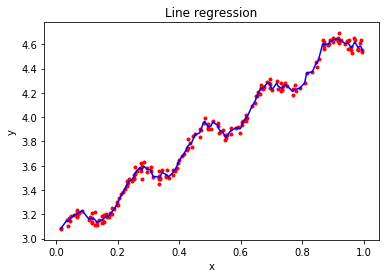

In [18]:
plot_line2(xArr, yArr, yHat)

In [19]:
def rssError(yArr,yHatArr): #yArr and yHatArr both need to be arrays
    return ((yArr-yHatArr)**2).sum()

In [20]:
abX,abY = loadDataSet("abalone.txt")

In [21]:
yHat01 = lwlrTest(abX[0:99],abX[0:99],abY[0:99],0.1)
yHat1 = lwlrTest(abX[0:99],abX[0:99],abY[0:99],1)
yHat10 = lwlrTest(abX[0:99],abX[0:99],abY[0:99],10)
rssError(abY[0:99],yHat01.T),rssError(abY[0:99],yHat1.T),rssError(abY[0:99],yHat10.T)

(56.78420911835284, 429.89056187031645, 549.11817088261)

In [22]:
yHat01 = lwlrTest(abX[100:199],abX[0:99],abY[0:99],0.1)
yHat1 = lwlrTest(abX[100:199],abX[0:99],abY[0:99],1)
yHat10 = lwlrTest(abX[100:199],abX[0:99],abY[0:99],10)
rssError(abY[100:199],yHat01.T),rssError(abY[100:199],yHat1.T),rssError(abY[100:199],yHat10.T)

(25119.45911115727, 573.5261441897086, 517.5711905382024)

In [23]:
def ridgeRegres(xMat,yMat,lam=0.2):
    xTx = xMat.T*xMat
    denom = xTx + np.eye(np.shape(xMat)[1])*lam
    if np.linalg.det(denom) == 0.0:
        print ("This matrix is singular, cannot do inverse")
        return
    ws = denom.I * (xMat.T*yMat)
    return ws

In [24]:
def ridgeTest(xArr,yArr):
    xMat = np.mat(xArr);
    yMat=np.mat(yArr).T
    yMean = np.mean(yMat,0)
    yMat = yMat - yMean     #to eliminate X0 take mean off of Y
    #regularize X's
    xMeans = np.mean(xMat,0)   #calc mean then subtract it off
    xVar = np.var(xMat,0)      #calc variance of Xi then divide by it
    xMat = (xMat - xMeans)/xVar
    numTestPts = 30
    wMat = np.zeros((numTestPts,np.shape(xMat)[1]))
    for i in range(numTestPts):
        ws = ridgeRegres(xMat,yMat,np.exp(i-10))
        wMat[i,:]=ws.T
    return wMat

In [25]:
ridgeWeight = ridgeTest(abX,abY)

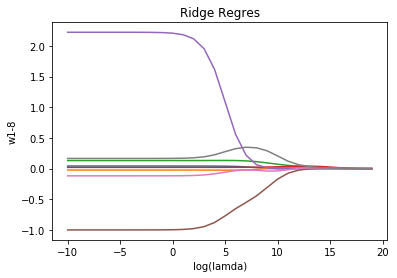

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([i-10 for i in range(30)], ridgeWeight)
plt.xlabel("log(lamda)")
plt.ylabel("w1-8")
plt.title("Ridge Regres")
plt.show()

In [27]:
np.shape(ridgeWeight)

(30, 8)

In [28]:
def regularize(xMat):#regularize by columns
    inMat = xMat.copy()
    inMeans = np.mean(inMat,0)   #calc mean then subtract it off
    inVar = np.var(inMat,0)      #calc variance of Xi then divide by it
    # 均值为0 方差为1
    inMat = (inMat - inMeans)/inVar
    return inMat

In [29]:
def stageWise(xArr,yArr,eps=0.01,numIt=100):
    xMat = np.mat(xArr); 
    yMat=np.mat(yArr).T
    yMean = np.mean(yMat,0)
    #can also regularize ys but will get smaller coef
    yMat = yMat - yMean     
    xMat = regularize(xMat)
    m,n= np.shape(xMat)
    returnMat = np.zeros((numIt,n)) #testing code remove
    ws = np.zeros((n,1)); 
    wsTest = ws.copy(); 
    wsMax = ws.copy()
    for i in range(numIt):
        #print (ws.T)
        lowestError = np.inf; 
        for j in range(n):
            for sign in [-1,1]:
                wsTest = ws.copy()
                wsTest[j] += eps*sign
                yTest = xMat*wsTest
                rssE = rssError(yMat.A,yTest.A)
                if rssE < lowestError:
                    lowestError = rssE
                    wsMax = wsTest
        ws = wsMax.copy()
        returnMat[i,:]=ws.T
    return returnMat

In [30]:
returnMat = stageWise(abX,abY,0.005,1000)

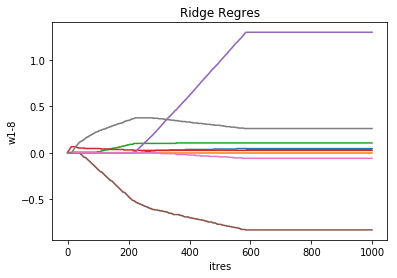

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(returnMat)
plt.xlabel("itres")
plt.ylabel("w1-8")
plt.title("Ridge Regres")
plt.show()

In [32]:
xMat = np.mat(abX)
yMat = np.mat(abY).T
xMat = regularize(xMat)
yM = np.mean(yMat,0)
yMat = yMat - yM

weights = standRegres(xMat, yMat.T)

In [33]:
weights.T , returnMat[np.shape(returnMat)[0]-1]

(matrix([[ 0.0430442 , -0.02274163,  0.13214087,  0.02075182,  2.22403814,
          -0.99895312, -0.11725427,  0.16622915]]),
 array([ 0.045,  0.   ,  0.105,  0.025,  1.295, -0.83 , -0.06 ,  0.26 ]))

In [34]:
def scrapePage(inFile,outFile,yr,numPce,origPrc):
    from bs4 import BeautifulSoup
    fr = open(inFile); fw=open(outFile,'a') #a is append mode writing
    soup = BeautifulSoup(fr.read(), "lxml")
    i=1
    currentRow = soup.findAll('table', r="%d" % i)
    while(len(currentRow)!=0):
        title = currentRow[0].findAll('a')[1].text
        lwrTitle = title.lower()
        if (lwrTitle.find('new') > -1) or (lwrTitle.find('nisb') > -1):
            newFlag = 1.0
        else:
            newFlag = 0.0
        soldUnicde = currentRow[0].findAll('td')[3].findAll('span')
        if len(soldUnicde)==0:
            print ("item #%d did not sell" % i)
        else:
            soldPrice = currentRow[0].findAll('td')[4]
            priceStr = soldPrice.text
            priceStr = priceStr.replace('$','') #strips out $
            priceStr = priceStr.replace(',','') #strips out ,
            if len(soldPrice)>1:
                priceStr = priceStr.replace('Free shipping', '') #strips out Free Shipping
            #print ("%s\t%d\t%s" % (priceStr,newFlag,title))
            fw.write("%d\t%d\t%d\t%f\t%s\n" % (yr,numPce,newFlag,origPrc,priceStr))
        i += 1
        currentRow = soup.findAll('table', r="%d" % i)
    fw.close()
    

In [35]:
# 准备数据运行一次就可以了
#scrapePage('setHtml/lego8288.html','legoPrice.txt',2006, 800, 49.99)
#scrapePage('setHtml/lego10030.html','legoPrice.txt',2002, 3096, 269.99)
#scrapePage('setHtml/lego10179.html','legoPrice.txt',2007, 5195, 499.99)
#scrapePage('setHtml/lego10181.html','legoPrice.txt',2007, 3428, 199.99)
#scrapePage('setHtml/lego10189.html','legoPrice.txt',2008, 5922, 299.99)
#scrapePage('setHtml/lego10196.html','legoPrice.txt',2009, 3263, 249.99)   

In [36]:
retX, retY = loadDataSet('legoPrice.txt')

In [37]:
def crossValidation(xArr,yArr,numVal=10):
    m = len(yArr)                           
    indexList =list(range(m))
    errorMat = np.zeros((numVal,30))#create error mat 30columns numVal rows
    for i in range(numVal):
        trainX=[]; trainY=[]
        testX = []; testY = []
        np.random.shuffle(indexList)
        for j in range(m):#create training set based on first 90% of values in indexList
            if j < m*0.9: 
                trainX.append(xArr[indexList[j]])
                trainY.append(yArr[indexList[j]])
            else:
                testX.append(xArr[indexList[j]])
                testY.append(yArr[indexList[j]])
        wMat = ridgeTest(trainX,trainY)    #get 30 weight vectors from ridge
        for k in range(30):#loop over all of the ridge estimates
            matTestX = np.mat(testX); 
            matTrainX=np.mat(trainX)
            meanTrain = np.mean(matTrainX,0)
            varTrain = np.var(matTrainX,0)
            matTestX = (matTestX-meanTrain)/varTrain #regularize test with training params
            yEst = matTestX * np.mat(wMat[k,:]).T + np.mean(trainY)#test ridge results and store
            errorMat[i,k]=rssError(yEst.T.A, np.array(testY))
            #print errorMat[i,k]
    meanErrors =np.mean(errorMat,0)#calc avg performance of the different ridge weight vectors
    minMean = float(min(meanErrors))
    bestWeights = wMat[np.nonzero(meanErrors==minMean)]
    #can unregularize to get model
    #when we regularized we wrote Xreg = (x-meanX)/var(x)
    #we can now write in terms of x not Xreg:  x*w/var(x) - meanX/var(x) +meanY
    xMat = np.mat(xArr); yMat=np.mat(yArr).T
    meanX = np.mean(xMat,0); varX = np.var(xMat,0)
    unReg = bestWeights/varX
    print ("the best model from Ridge Regression is:\n",unReg)
    print ("with constant term: ",-1*sum(np.multiply(meanX,unReg)) + np.mean(yMat))

In [38]:
crossValidation(retX, retY)

the best model from Ridge Regression is:
 [[-3.05329684e+01  9.89276479e-04 -5.79819176e+00  1.85804211e+00]]
with constant term:  [[61952.94887638   681.20567774   688.25069753    70.49274014]]
